In [21]:
import pandas as pd
from dtypes import breweries_dtypes 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

df = pd.read_csv('../data/breweries.csv', dtype=breweries_dtypes)
df.shape

(68989, 8)

In [29]:
country_count = df.country.value_counts()
country_count = country_count.rename_axis('country').reset_index(name='value_count')
country_count_sum = country_count.value_count.sum()
country_count.country = country_count.apply(lambda row: 'Other' if (row.value_count / country_count_sum) * 100 > 100 else row.country, axis=1)
country_count = country_count.groupby('country').agg({'value_count': 'sum'}).reset_index()
country_count = country_count.sort_values('value_count')
country_count

,country,value_count
64,Falkland Islands,1
146,Palau,1
55,East Timor,1
145,Pakistan,1
142,Northern Mariana Islands,1
...,...,...
28,Brazil,3277
73,Germany,3527
160,Russia,3830
59,England,4099


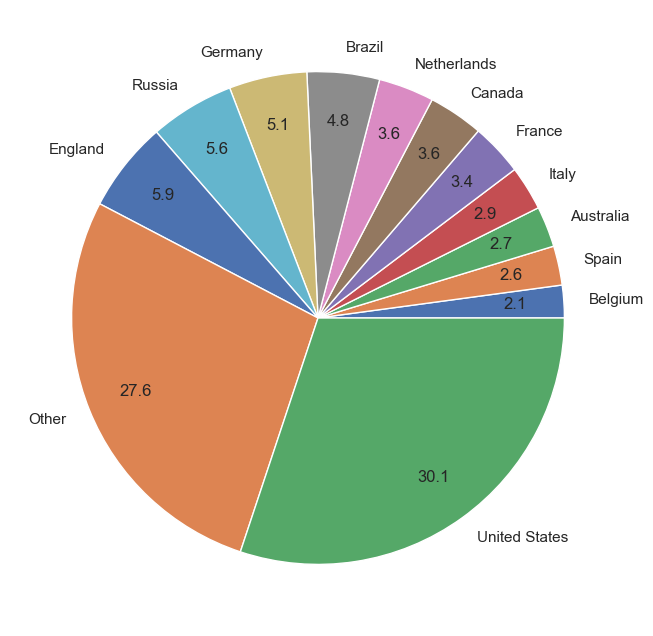

In [28]:
plt.figure(figsize=(12,8))
plt.pie(country_count.value_count, labels=country_count.country, autopct='%.1f', pctdistance=0.8);

## Распределение типов пивоварен в разных странах

In [3]:
brewery_types_count = df.type.value_counts()
labels = brewery_types_count.index
colors = sns.color_palette().as_hex()
colors.append('lightcoral')
cmap = dict(zip(labels, colors))
pie_colors = [cmap[x] for x in labels]

def brewery_types_pie(country=""):
	if (country):
		brewery_types_count = df[df.country == country].type.value_counts()
	else:
		brewery_types_count = df.type.value_counts()

	plt.figure(figsize=(16,9))
	plt.pie(brewery_types_count, labels=labels, colors=pie_colors, autopct='%.1f', pctdistance=0.8);
	plt.title(country, fontsize=14, fontweight="bold")

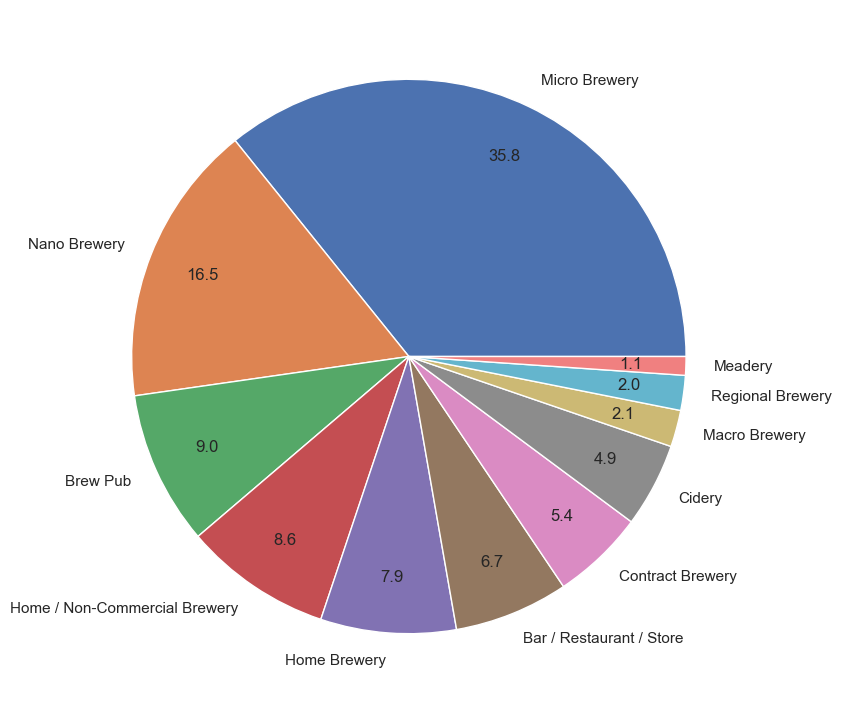

In [4]:
brewery_types_pie()

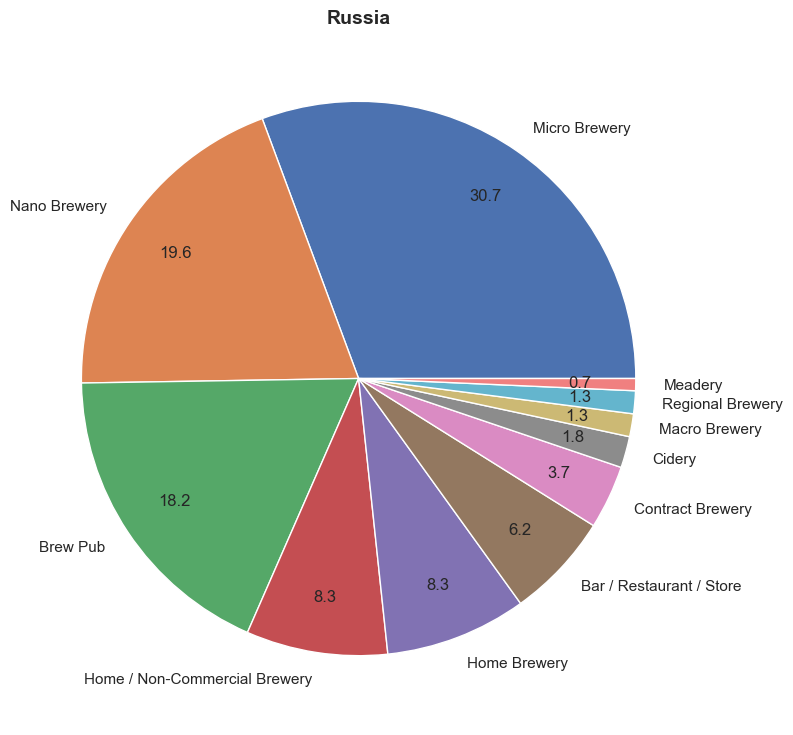

In [5]:
brewery_types_pie('Russia')

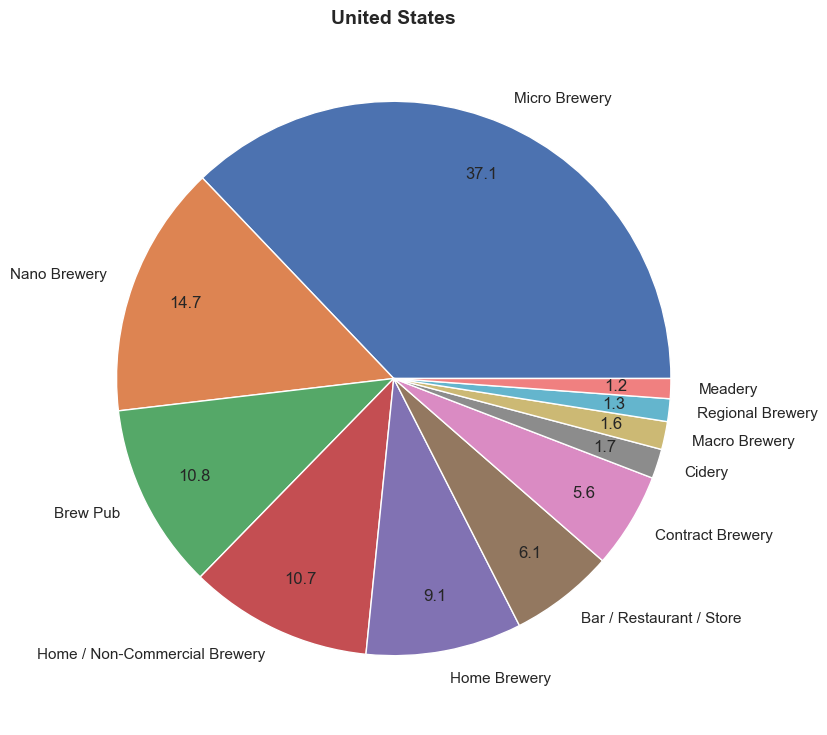

In [6]:
brewery_types_pie('United States')

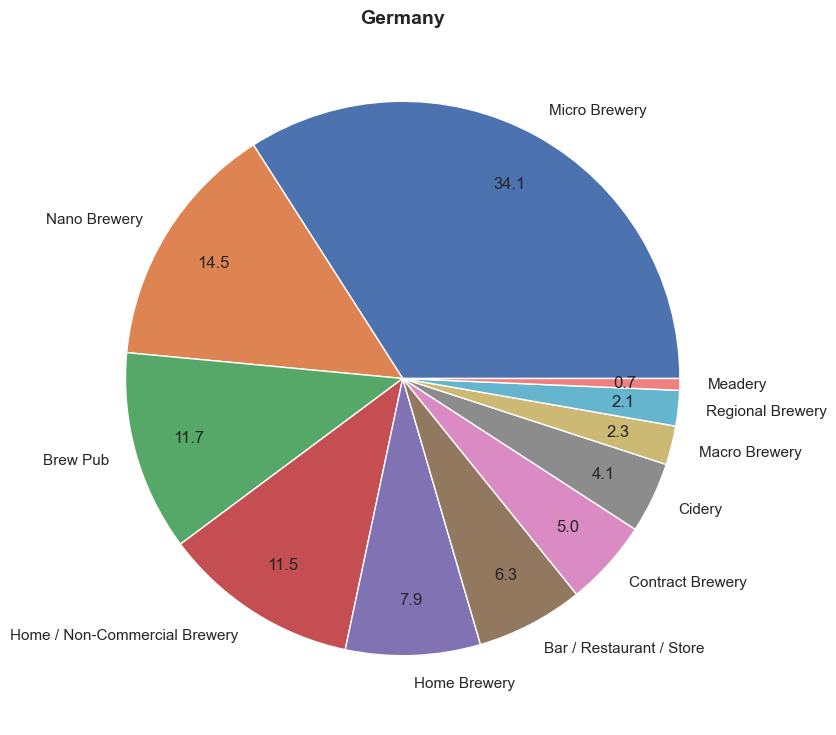

In [7]:
brewery_types_pie('Germany')

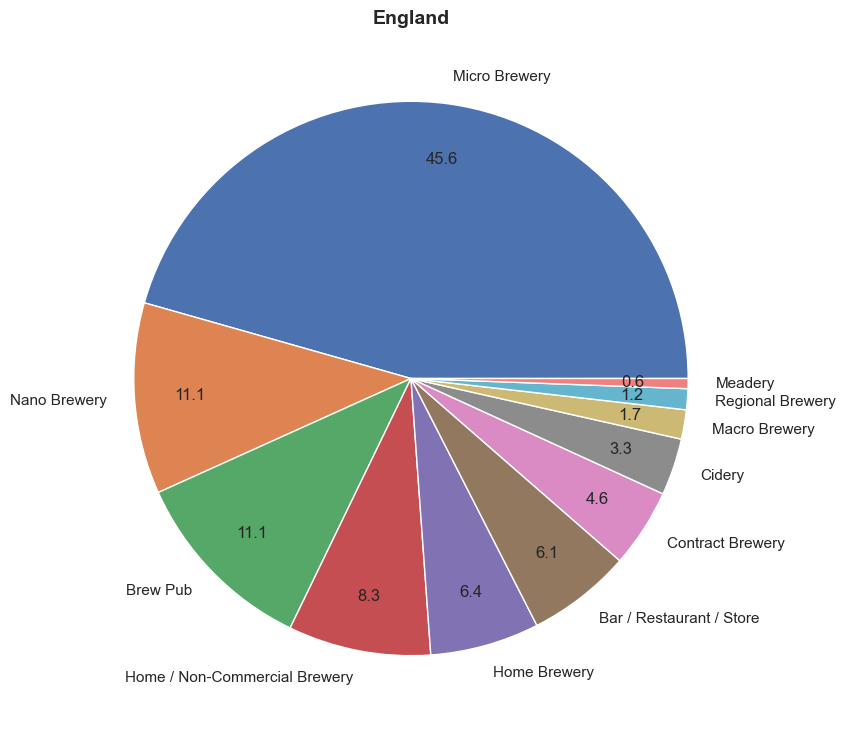

In [8]:
brewery_types_pie('England')

## Распределение пивоварен по странам

In [9]:
country_count = df.country.value_counts()
country_count = country_count.rename_axis('country').reset_index(name='value_count')
country_count_sum = country_count.value_count.sum()
country_count.country = country_count.apply(lambda row: 'Other' if (row.value_count / country_count_sum) * 100 < 2.1 else row.country, axis=1)
country_count = country_count.groupby('country').agg({'value_count': 'sum'}).reset_index()
country_count

,country,value_count
0,Australia,1845
1,Belgium,1476
2,Brazil,3277
3,Canada,2492
4,England,4099
5,France,2365
6,Germany,3527
7,Italy,2008
8,Netherlands,2510
9,Other,19019


In [10]:
"""
plt.figure(figsize=(16,9))
plt.pie(country_count.value_count, labels=country_count.country, autopct='%.1f');
"""

"\nplt.figure(figsize=(16,9))\nplt.pie(country_count.value_count, labels=country_count.country, autopct='%.1f');\n"

## Распределение пивоварен по количеству выпускаемых сортов пива

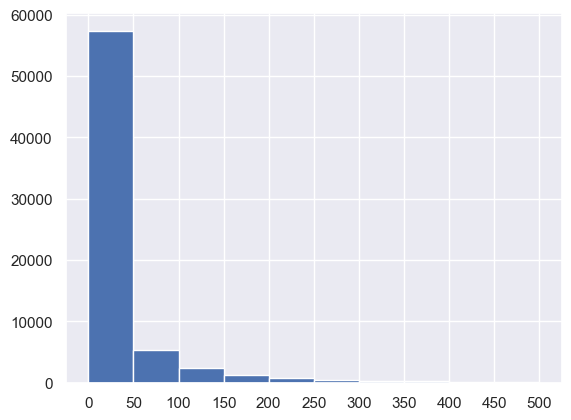

In [11]:
ax = df[df.total_beers < 500].total_beers.hist(bins=[*range(0,550,50)]);
ax.set(xticks=[*range(0,550,50)]);

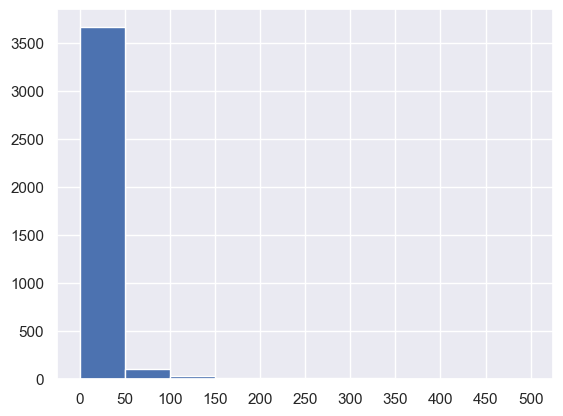

In [12]:
df_rus = df[df.country == 'Russia']
ax = df_rus[df_rus.total_beers < 500].total_beers.hist(bins=[*range(0,550,50)]);
ax.set(xticks=[*range(0,550,50)]);

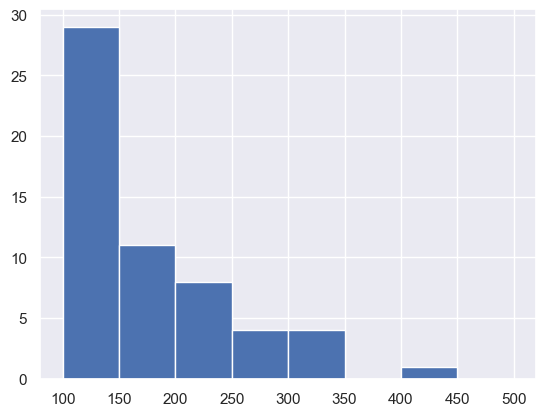

In [20]:
df_rus = df[df.country == 'Russia']
ax = df_rus[df_rus.total_beers < 500].total_beers.hist(bins=[*range(100,550,50)]);
# ax = df_rus[df_rus.total_beers < 500].total_beers.hist(bins=[*range(0,550,50)]);
ax.set(xticks=[*range(100,550,50)]);
# ax.set(xticks=[*range(0,550,50)]);

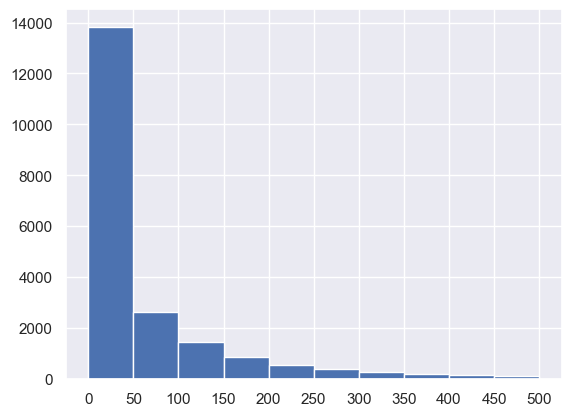

In [14]:

df_usa = df[df.country == 'United States']
ax = df_usa[df_usa.total_beers < 500].total_beers.hist(bins=[*range(0,550,50)]);
ax.set(xticks=[*range(0,550,50)]);

## Распределение пивоварен по городам

In [15]:
df_rus = df[df.country == 'Russia']
df_usa = df[df.country == 'United States']

In [16]:
print(df_rus.city.nunique())
print(df_usa.city.nunique())

714
4275


In [17]:
df_rus.city.value_counts()[:20]

Moscow              266
Saint Petersburg    256
Novosibirsk          44
Krasnodar            38
Yekaterinburg        37
Chelyabinsk          35
Rostov-on-Don        30
Nizhny Novgorod      30
Voronezh             28
Kaliningrad          27
Barnaul              27
Samara               26
Omsk                 21
Krasnoyarsk          20
Tolyatti             20
Volgograd            19
Kemerovo             18
Perm                 17
Sochi                17
Lipetsk              17
Name: city, dtype: int64

In [18]:
df_usa.city.value_counts()[:20]

Portland         204
New York         153
Chicago          151
San Diego        143
Denver           120
Seattle          104
Austin            88
Los Angeles       72
Philadelphia      68
Washington        66
San Francisco     64
Columbus          63
Nashville         59
Albuquerque       58
Pittsburgh        58
Milwaukee         58
Indianapolis      57
Minneapolis       56
Charlotte         55
Baltimore         55
Name: city, dtype: int64